In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./Data/hospital_admissions.csv")
data.head()

,admissions
0,92
1,85
2,80
3,87
4,79


In [4]:
data.shape

(12, 1)

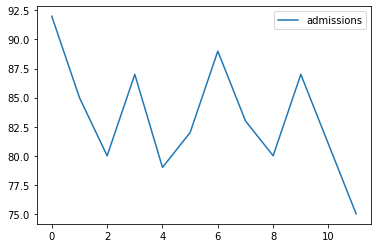

In [7]:
data.plot()
plt.show()

In [22]:
#### Compute moving average with time-lag as 3
moving_avg = data.rolling(3).mean()
moving_avg

,admissions
0,NaN
1,NaN
2,85.666667
3,84.000000
4,82.000000
5,82.666667
6,83.333333
7,84.666667
8,84.000000
9,83.333333


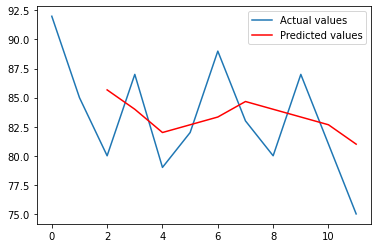

In [23]:
plt.plot(data)
plt.plot(moving_avg, color = 'red')
plt.legend(["Actual values", "Predicted values"]) 

In [19]:
#### Compute moving averages by taking period from 2 to n/2
#### Find best RMSE among all these
ls=[]
for i in range(2, int(len(data)/2)+1):
    moving_avg = data.rolling(i).mean()
    diff = data - moving_avg
    diff.dropna(inplace = True)
    rmse = np.sqrt((diff**2).sum(axis=0)/len(diff))
    ls.append((rmse[0],i))
ls

[(3.0562900861844073, 2),
 (3.9200340134578786, 3),
 (3.181980515339464, 4),
 (3.9705163392183622, 5),
 (4.160471584991755, 6)]

In [25]:
best_rmse = min(ls)[0]
best_lag = min(ls)[1]
print(f'For given data, best-suited lag is {best_lag} with RMSE ={best_rmse}')

For given data, best-suited lag is 2 with RMSE =3.0562900861844073


In [26]:
ideal_moving_avg = data.rolling(best_lag).mean()

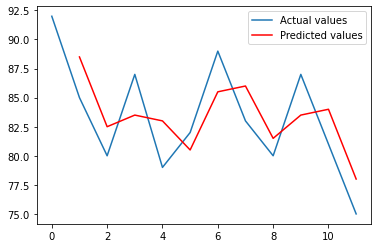

In [27]:
plt.plot(data)
plt.plot(ideal_moving_avg, color = 'red')
plt.legend(["Actual values", "Predicted values"]) 